# Udacity Data Scientist Nanodegree
## Young people survey

For this case study we are imagining that we are a greedy sports gadget company 'GSG (Greedy Sports Gadgets)'. 

## 1. Busines Understanding
We have a large customer database whith plenty of personal information like hobbies, interests, demographic information and so on. 

This information was gathered in the course of a bonus program. Now we want to use this data in our advertisement department and publish targeted advertisements. We are mainly interested in three basic questions to boost the number of sales:

**Predict spending habbits**

Here we want to predict what factors (personal traits, happibts, hobbies or demographics) can predict if a person is spending a lot of money on gadgets (Since we want to sell a lot of them and want
to address exactly those people with the right advertisement)?

**Predict healthy lifestyle**

Just by looking at people it is hard to predict if someone lives a healthy lifestyle. But we are interested in selling our newest nutrition and vitamine products, without wasting advertisement budget on people that are not likely to buy those products. 

**Christmas sellings**

Christmas is coming up and we want to target people that are likely to spend a lot of money on gifts. Since we know the hobbies, movie and music preferences of our customers (don't ask mey why we know this)
we want to predict which ones are likely to buy lots of presents for their loved ones.

## 2. Data understanding
Before we can answer the questions stated above, we need to understand the content of our user database 

In [111]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this two lines are required during development, when we change functions in our utilities class, so that the module is reloaded
try:
    %load_ext autoreload 
except: pass
%autoreload 2
import src.utilities as utilities

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
# load data from the files in the "data" subfolder
df_raw = pd.read_csv('./data/responses.csv') # This file contains the actual data (feedback from our customers)
df_columns = pd.read_csv('./data/columns.csv') # This file contains an explanation of the questions that was posed to the customers

Take a first peak at the data 

In [90]:
df_raw.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [91]:
df_columns.head()

,original,short,category
0,I enjoy listening to music.,Music,Music
1,I prefer.,Slow songs or fast songs,Music
2,"Dance, Disco, Funk",Dance,Music
3,Folk music,Folk,Music
4,Country,Country,Music


### Column Types
Now we want to evaluate what kind of columns we have here. Do we have categorical columns or only numerical 

In [92]:
pd.DataFrame(df_raw.dtypes).groupby(by=0).size()

0
int64        5
float64    134
object      11
dtype: int64

It seems that we have 134 float columns, 5 integer columns and 11 categorical columns. 

The next step is to take a first glimpse of the data distribution.

### Distribution of Music Preferences

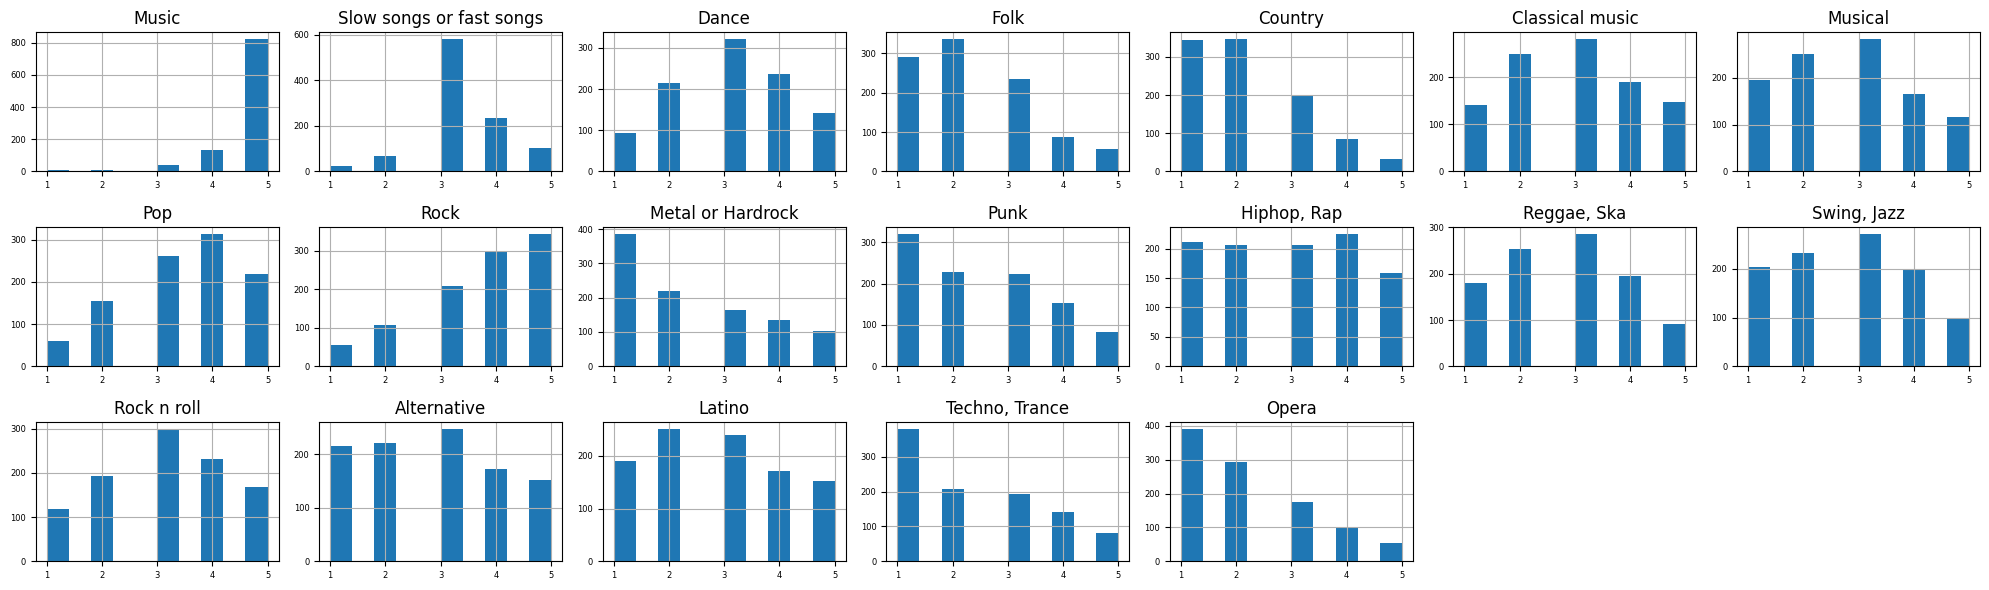

In [93]:
df_category_columns = df_columns[df_columns.category == 'Music']['short']
utilities.plot_dataframe_histogram(df_raw[df_category_columns])

### Distribution of Movie preferences

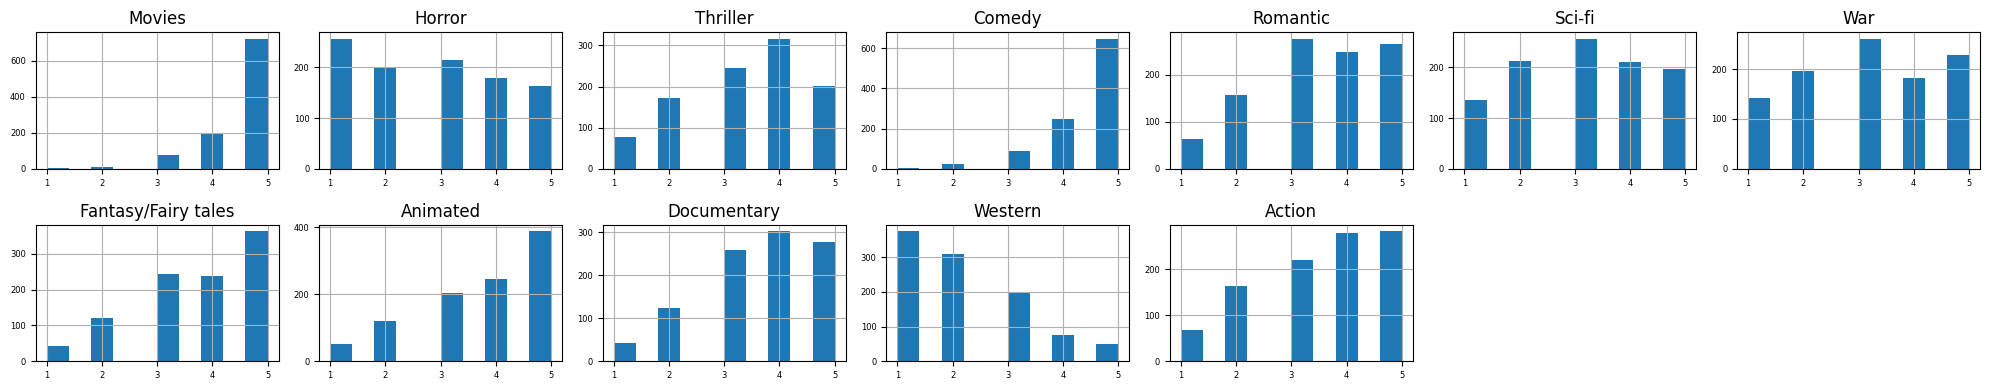

In [94]:
df_category_columns = df_columns[df_columns.category == 'Movie']['short']
utilities.plot_dataframe_histogram(df_raw[df_category_columns])

### Distribution of Hobbies

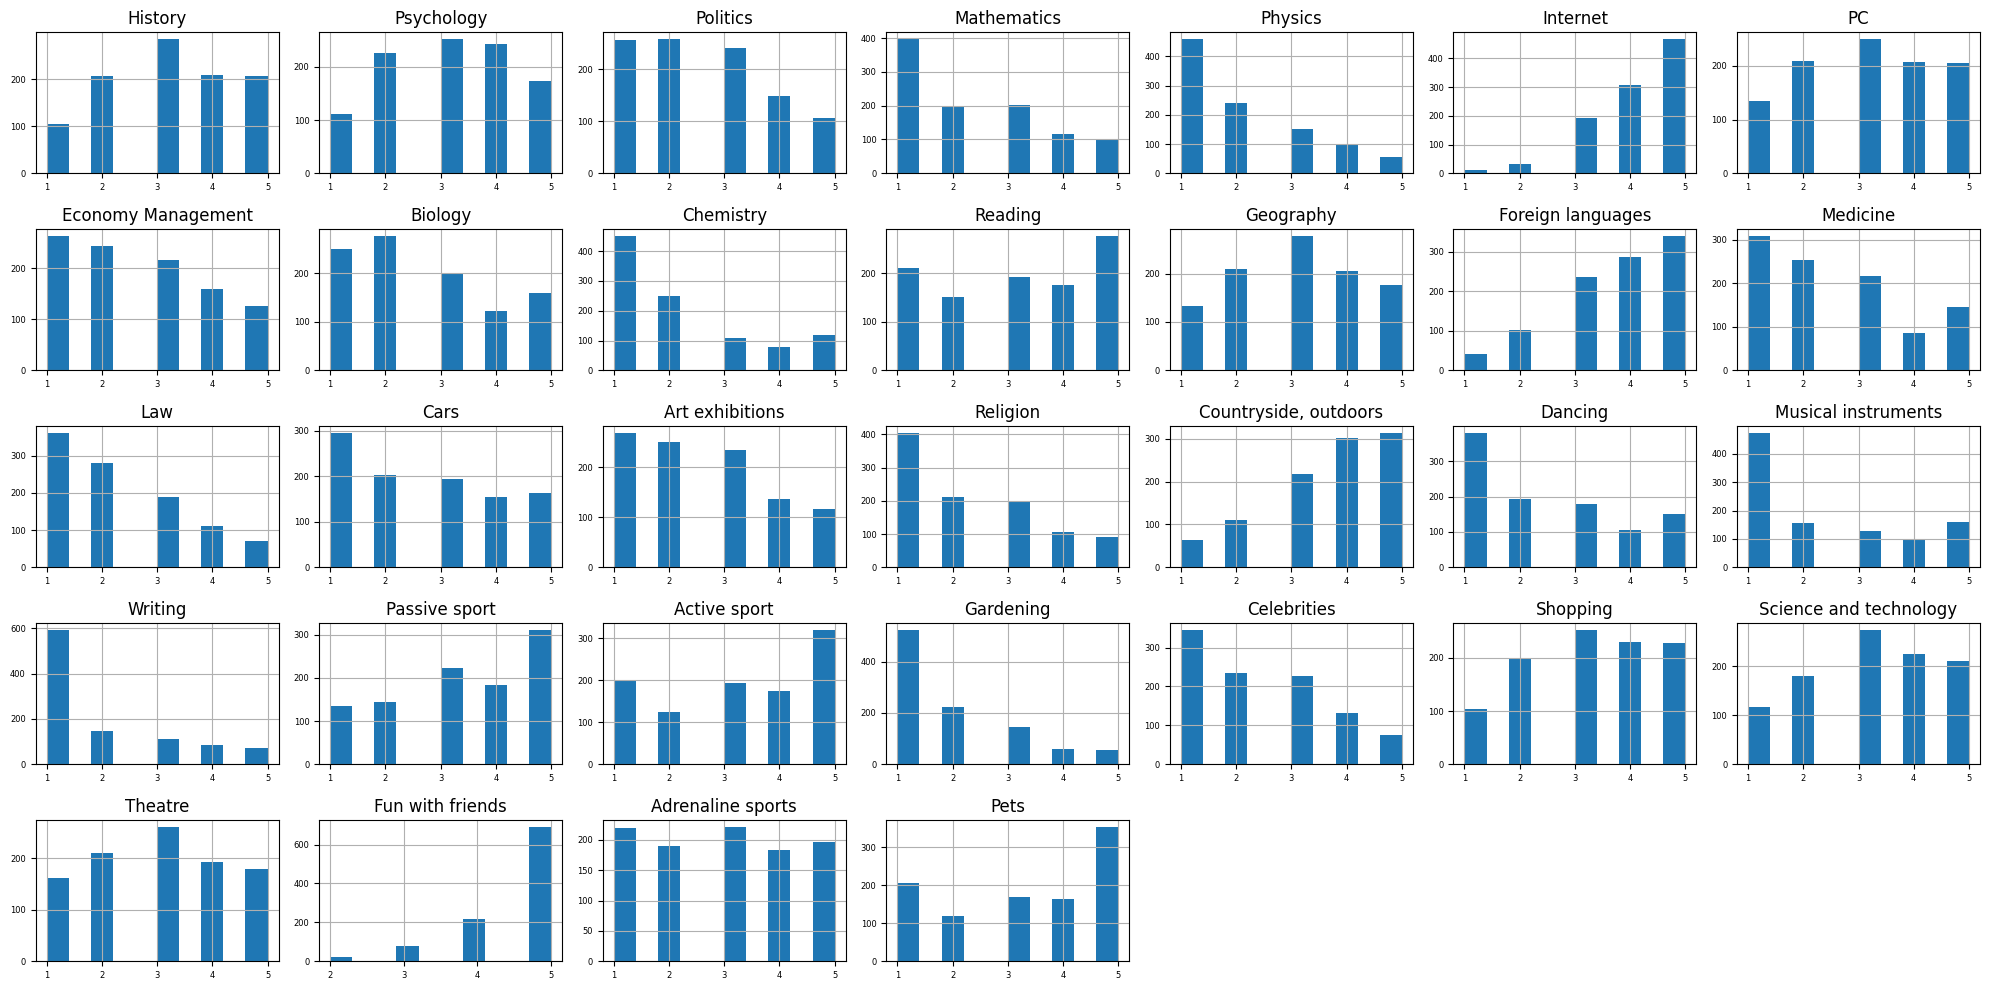

In [95]:
df_category_columns = df_columns[df_columns.category == 'Hobbies']['short']
utilities.plot_dataframe_histogram(df_raw[df_category_columns])

### Phobia distribution

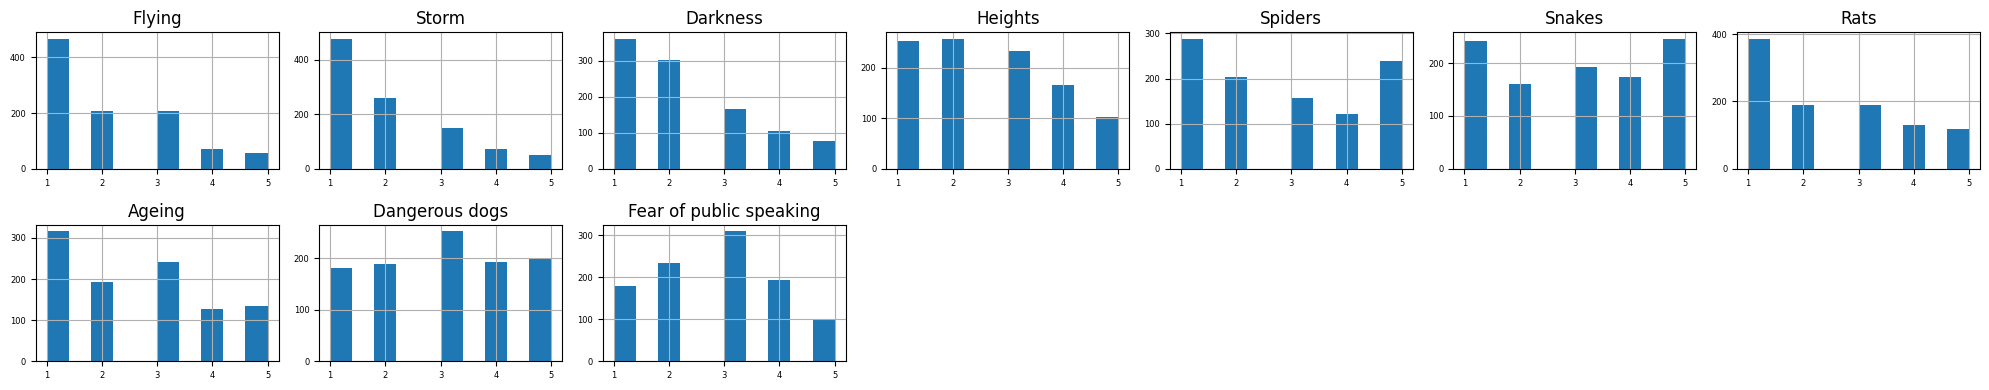

In [96]:
df_category_columns = df_columns[df_columns.category == 'Phobias']['short']
utilities.plot_dataframe_histogram(df_raw[df_category_columns])

### Health habits distribution

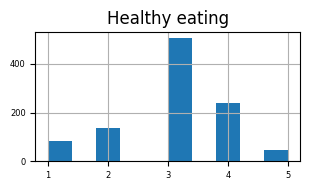

In [97]:
df_category_columns = df_columns[df_columns.category == 'Health']['short']
utilities.plot_dataframe_histogram(df_raw[df_category_columns])

### Personal Interests distribution

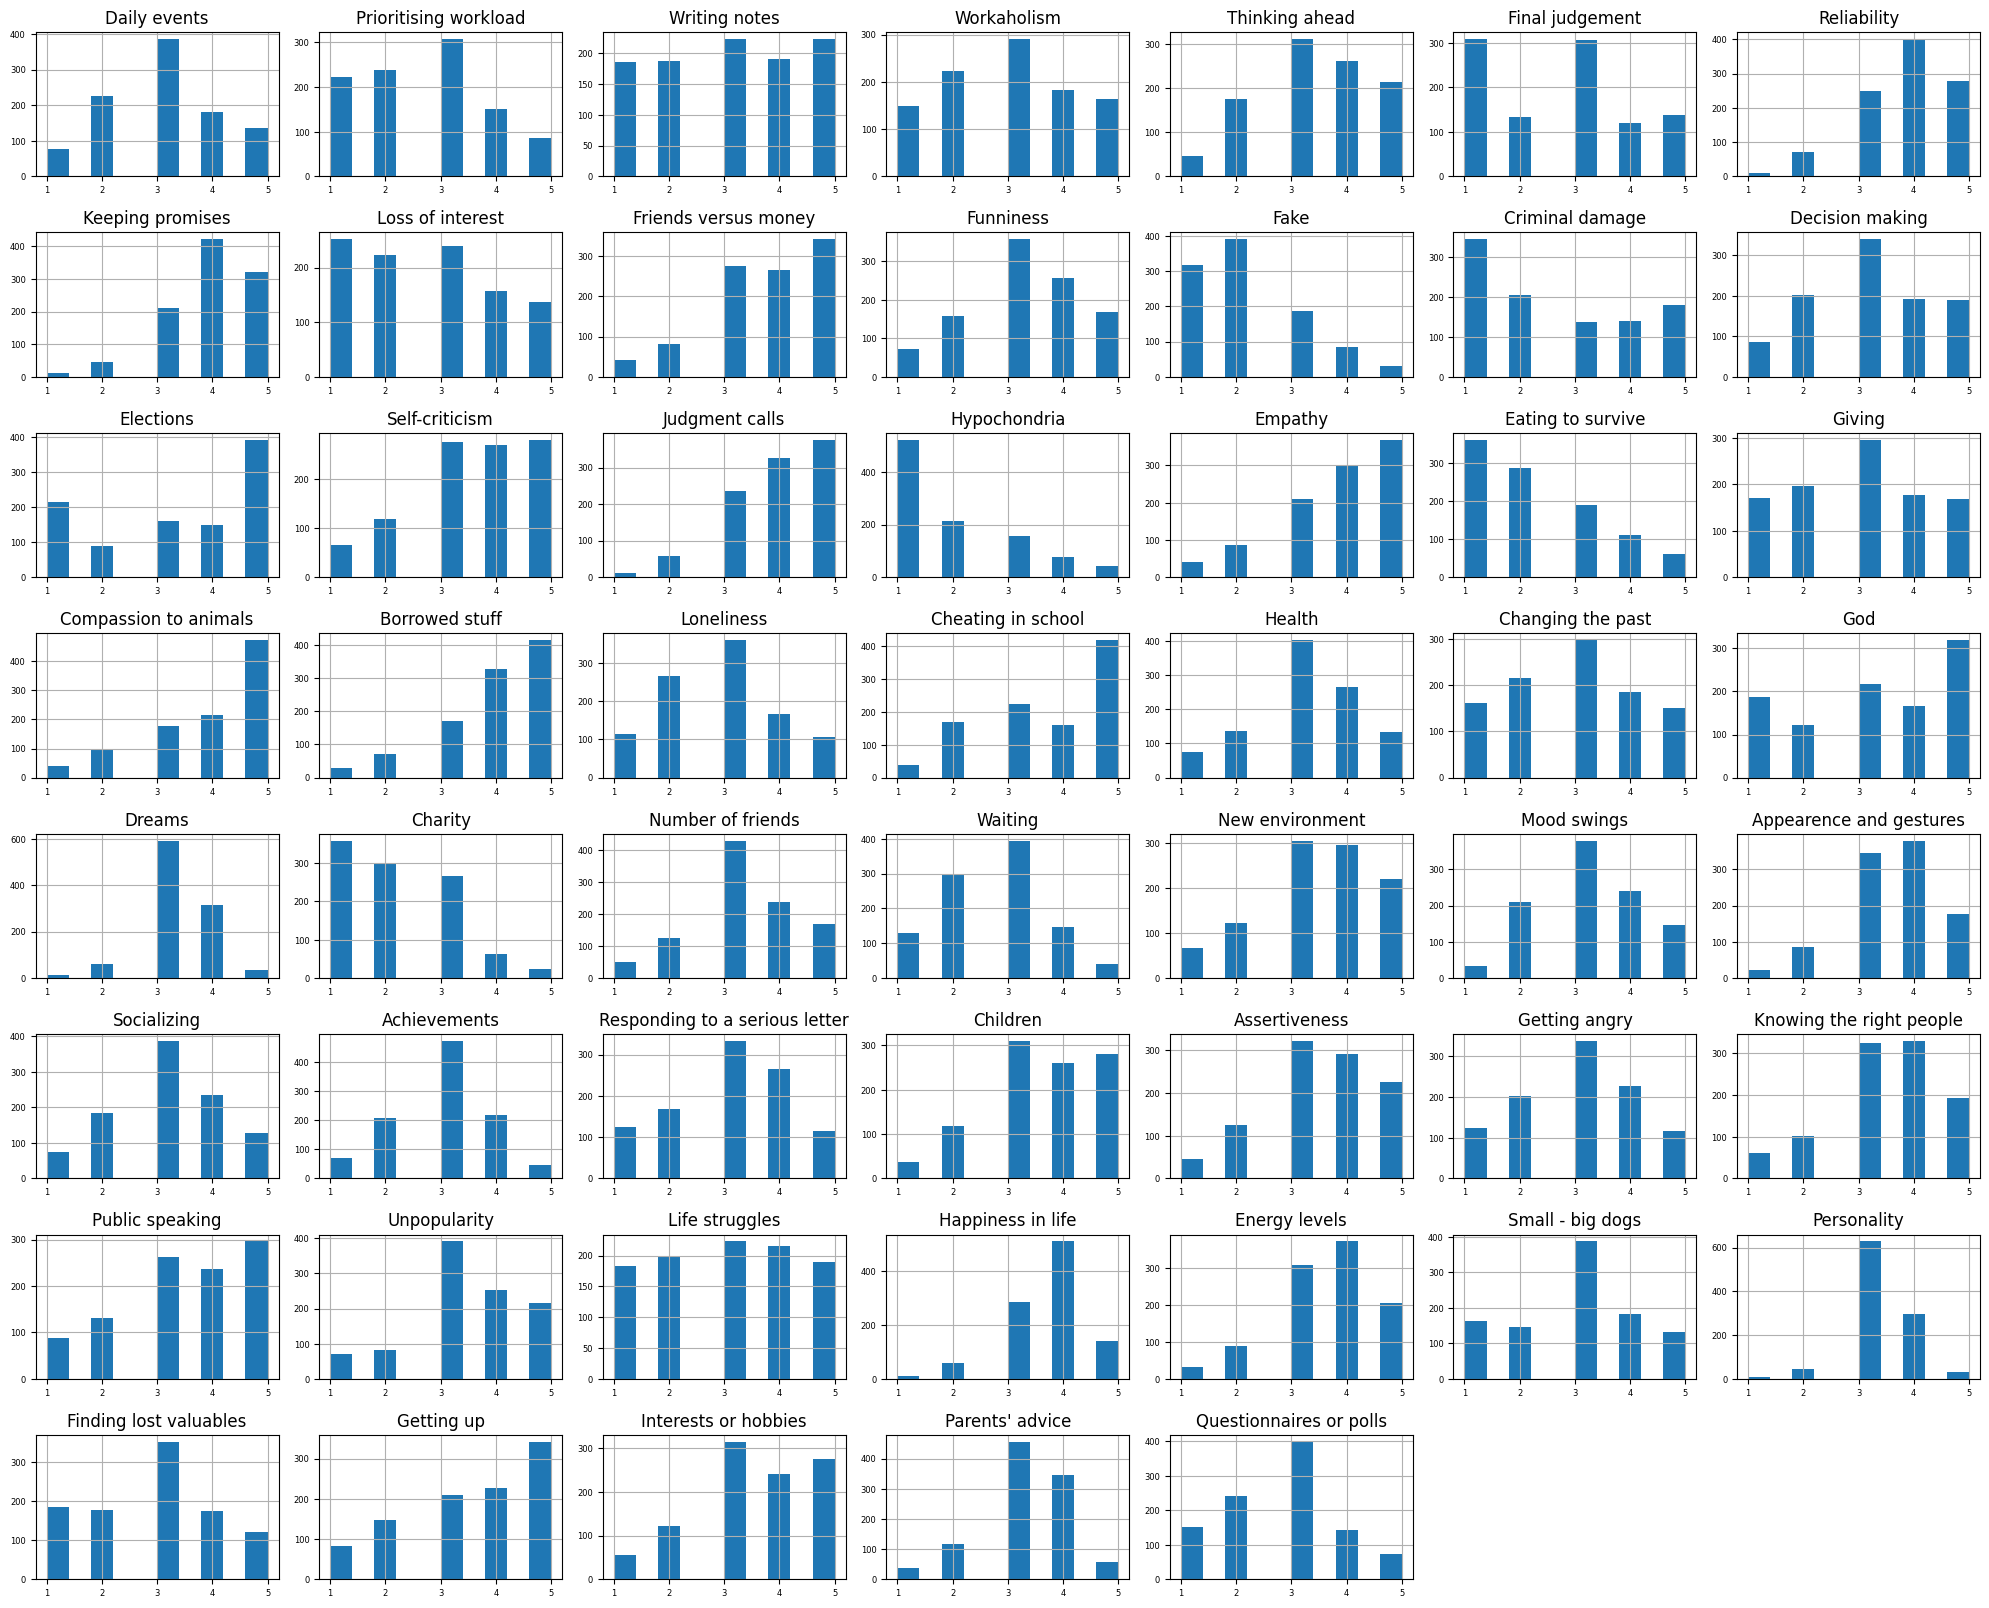

In [98]:
df_category_columns = df_columns[df_columns.category == 'Personal']['short']
utilities.plot_dataframe_histogram(df_raw[df_category_columns])

For us the point "Self criticism" might be relevant. People are perhaps more willingly to work on them self and buy sport equipment and healty food. 

### Spending Habbits Distribution

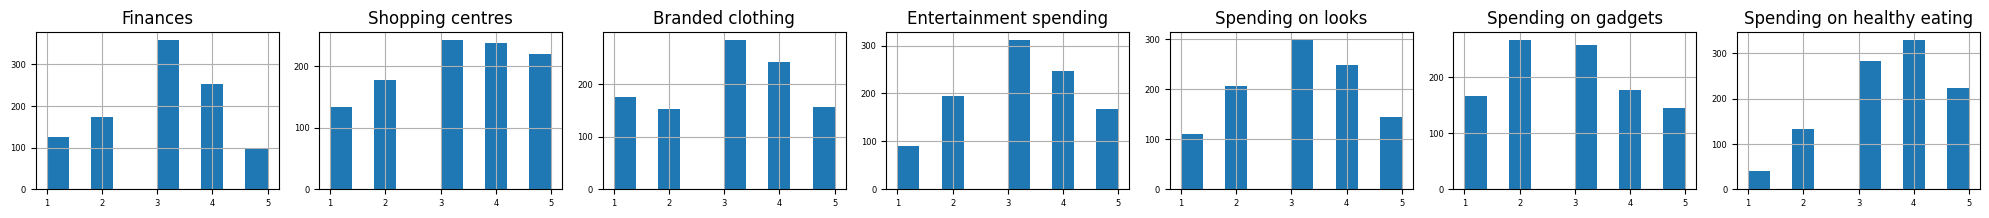

In [99]:
df_category_columns = df_columns[df_columns.category == 'Spending']['short']
utilities.plot_dataframe_histogram(df_raw[df_category_columns])

For us it is good to observe that our costumers are willing to spend money on healty eating. 

### Demographic Info Distribution

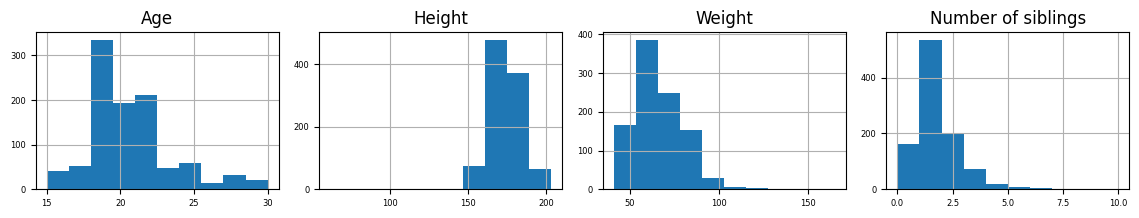

In [100]:
df_category_columns = df_columns[df_columns.category == 'Demographic']['short']
utilities.plot_dataframe_histogram(df_raw[df_category_columns])

It is interesting to note that our costumers are quite young (as the name dataset already suggests) and also there seems to be no overweight costumers. Which is good since we want to sell sport gadgets. 

### Corelation of parameters
As a next point of interest we want to take a look at the corelation of the numeric variables. This will be displayed as heatmap

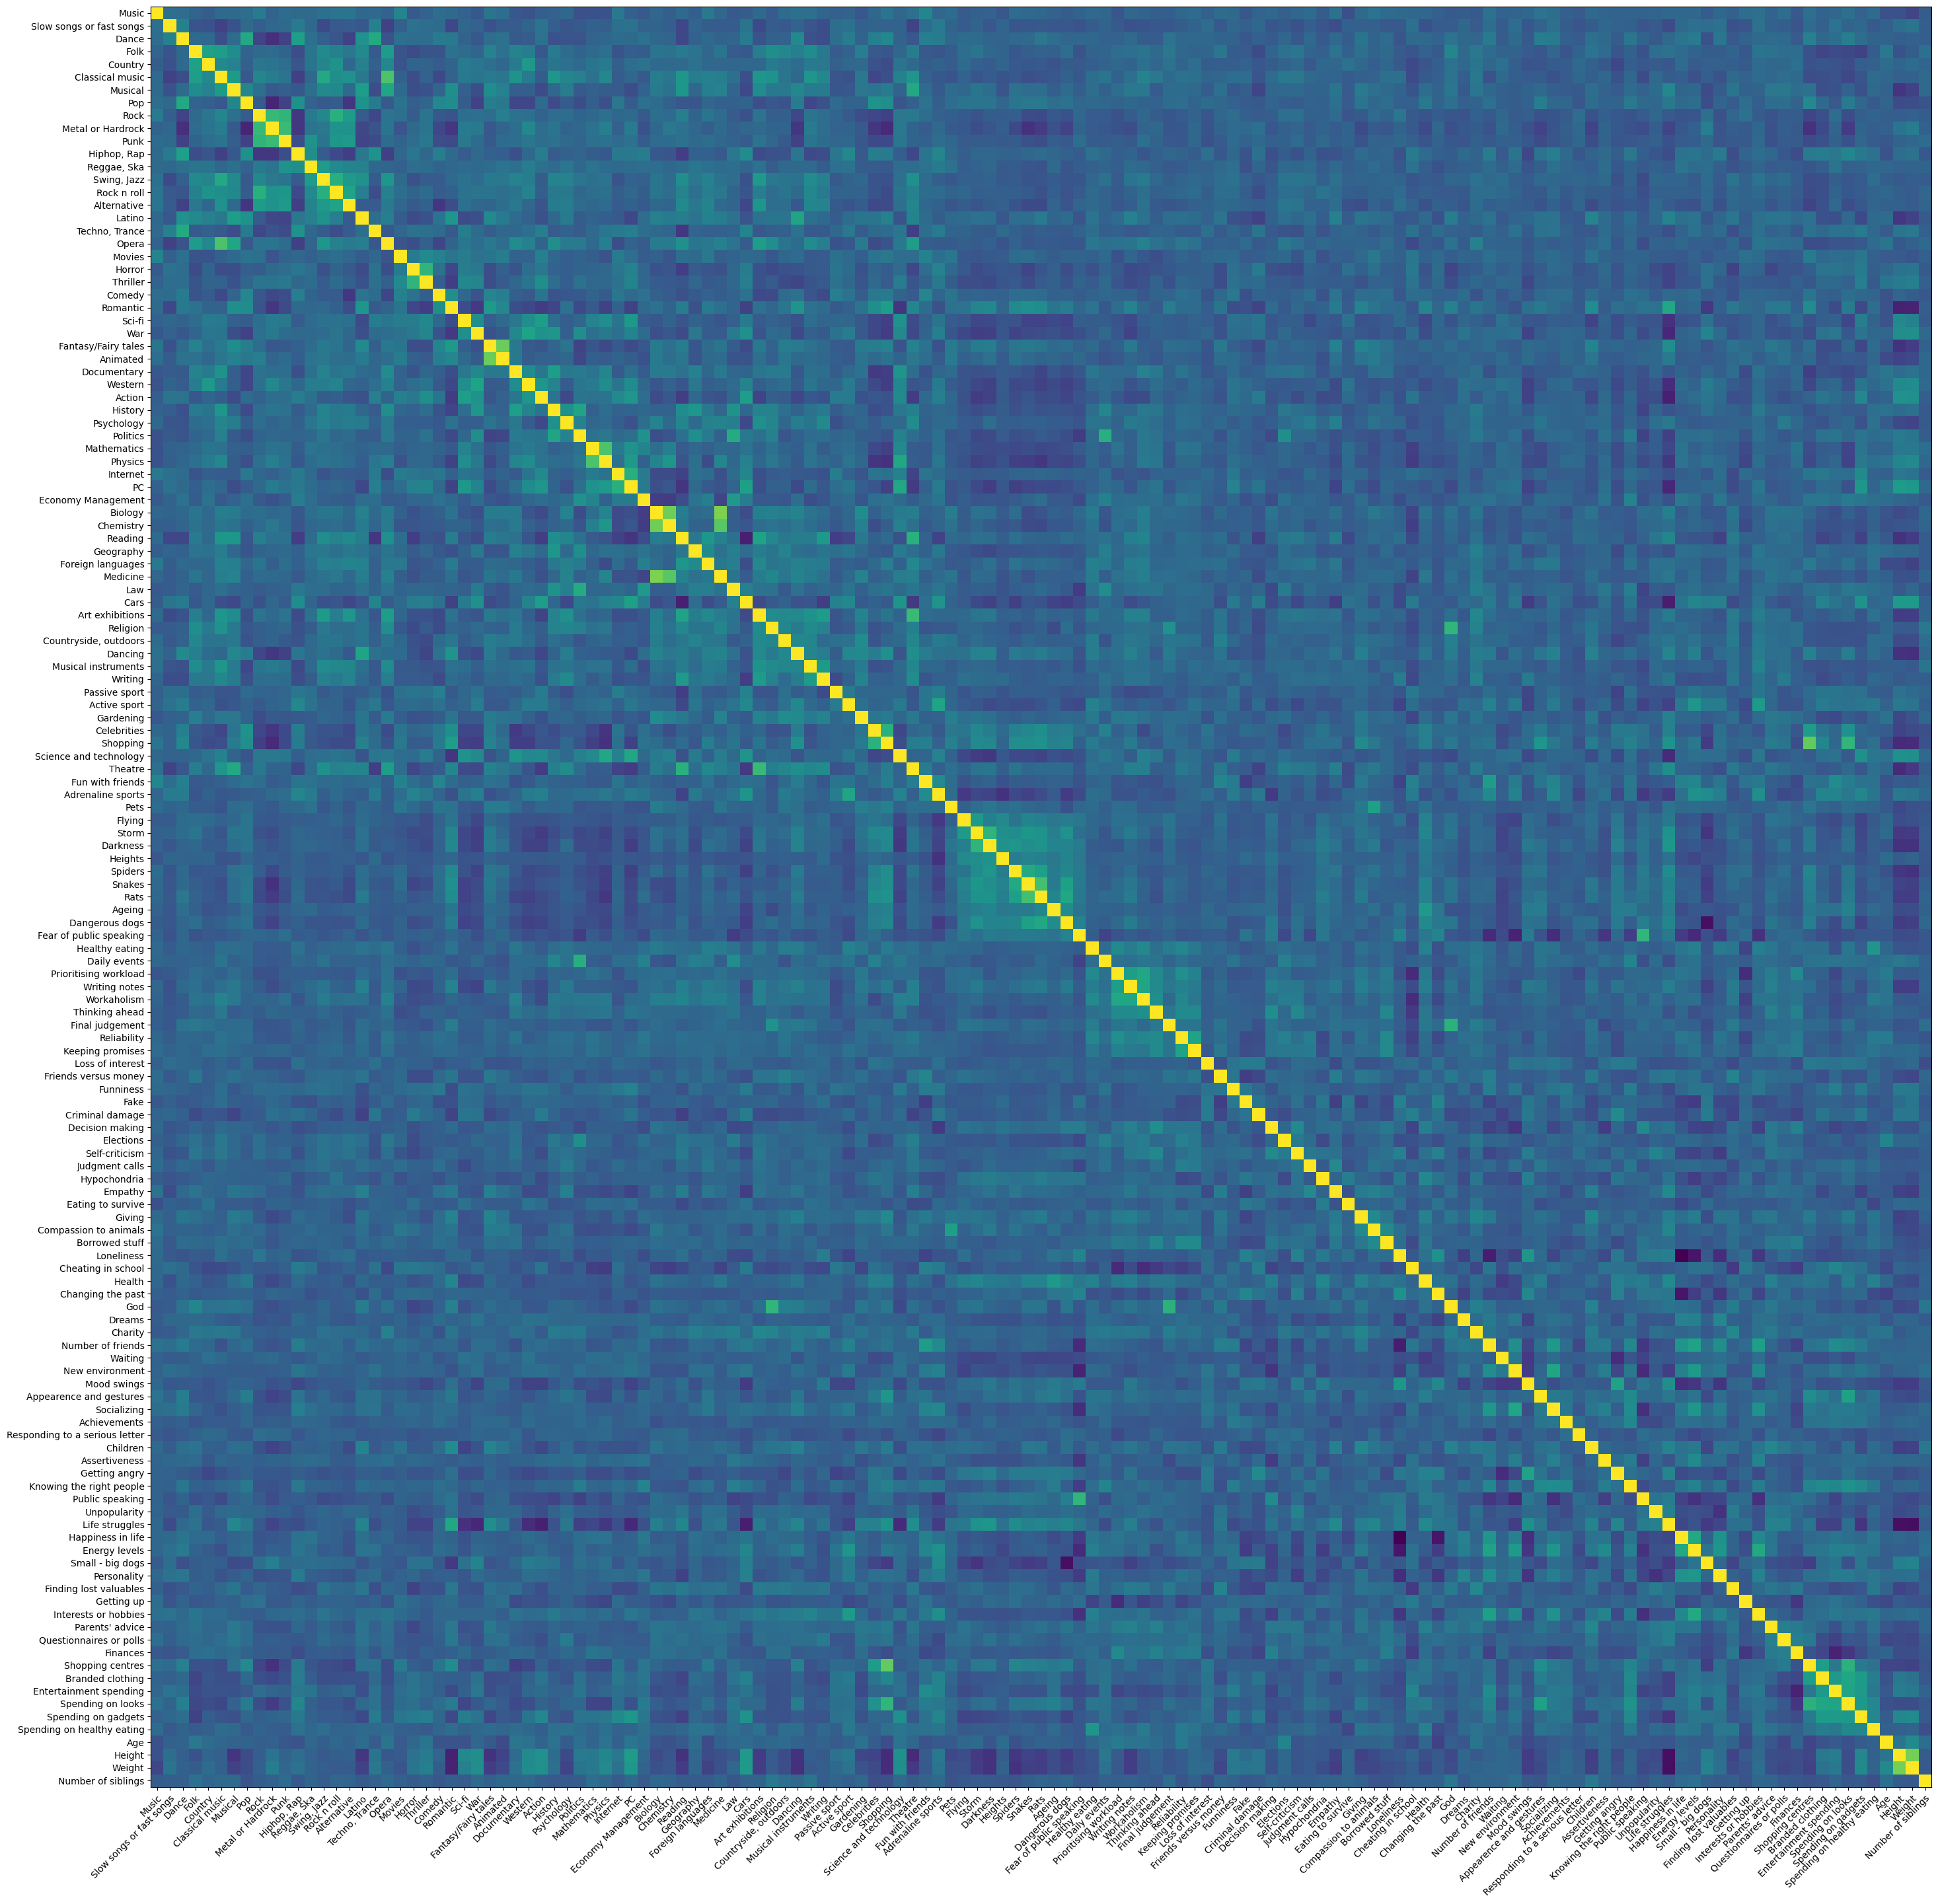

In [101]:
utilities.plot_dataframe_correlation(df_raw)

The corelation matrix is quite difficult to read, but we may see som stronger corelations. For example someone interested in medicine is also mostly interested in biology. Or more relevant for us. Someone interested in shopping centers is also very likely interested in shopping at all (what a coincidence).

## 3. Data preparation
After we have taken a look at the data we need to prepare it for further analytics tasks. While in the original dataset there were no null values, we have introduced a couple of datasets to show the process of imputing missing values.

### Correct values
For the first step in the data preparation we are using our domain knowledge. For most of the survey questions that was used only values between 1 and 5 are allowed values. Here we want to ensure that there are no unwanted values present, that could alter our models later on.

In [4]:
# we ommit the questions from the Demographic category, since there are numerical fields that are not lmited (e.g. Height or Age).
# For sake of simplicity we only select a handful of columns

columns = ['Music', 'Dance', 'Folk', 'Country', 'Movies']
df_corrected = utilities.preparation_correct_values(df_raw, columns)
df_corrected.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


### Data removal
For this dataset it was not necessary to remove columns or rows because there simply were none with all null values or even large portions of null values.
For sake of completeness, we will run a function that would remove columns with all nua values

In [5]:
df_cleaned = utilities.preparation_clean_empty_cols(df_corrected)
df_cleaned.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


### Impute missing values
The original dataset included no missing cells / rows. For training purposes we added a couple or rows where some fields were empty. Here we fant to impute the mean values for this columns.

In [6]:
df_imputed = utilities.preparation_impute_values(df_cleaned)
df_imputed.tail()  # tail, because we added those faulty columns at the end

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
1008,5.0,3.0,3.0,3.000000,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats
1009,5.0,5.0,4.0,3.000000,2.0,3.0,3.0,4.0,1.0,1.0,...,21.0,185.0,72.0,1.0,male,right handed,secondary school,no,village,house/bungalow
1010,4.0,4.0,4.0,2.286991,3.0,5.0,1.0,5.0,4.0,1.0,...,23.0,185.0,92.0,0.0,male,left handed,secondary school,yes,city,block of flats
1011,5.0,3.0,3.0,2.000000,3.0,1.0,2.0,3.0,4.0,3.0,...,18.0,164.0,56.0,3.0,female,right handed,secondary school,no,city,block of flats
1012,5.0,3.0,5.0,1.000000,2.0,1.0,2.0,3.0,2.0,1.0,...,18.0,162.0,54.0,1.0,female,right handed,secondary school,no,city,house/bungalow


### Categorical values
There are a couple of categorical columns in our user databaset. For the next step, to model and predict stuff, we need to transfer them to dummy columns (numerical columns) that can be used for modeling far better than the original (text) columns

In [45]:
df_prepared = utilities.preparation_remove_categorical(df_imputed)
df_prepared.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Education_nan,Only child_no,Only child_yes,Only child_nan,Village - town_city,Village - town_village,Village - town_nan,House - block of flats_block of flats,House - block of flats_house/bungalow,House - block of flats_nan
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,0,1,0,0,0,1,0,1,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,0,1,0,0,1,0,0,1,0,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,0,1,0,0,1,0,0,1,0,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,0,0,1,0,1,0,0,0,1,0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,0,1,0,0,0,1,0,0,1,0


## 4. Data Modeling
Now we have cleaned and prepared our data. Now it is time to actually create models for our 3 busines questions we wanted to answer

### 4.1 Predict spending habbits
The first question is, if we can predict the spending habbits based on the personal traits, the habbits or hobbies. The ultimate goal is to know what people we need to target with our advertisement where we expectthem to spend a lot of money for our products. 

In [127]:
x, y, x_train, y_train, x_test, y_test, train_score, test_score = utilities.model_clean_fit(df_prepared, 'Finances')
print('Model score to predict the spending habbits: Training Score: %s; Test Score: %s' % (str(train_score), str(test_score)))

Model score to predict the spending habbits: Training Score: 0.40167577801054444; Test Score: -0.02352787634640663


Now we have trained a model. BUT when we take a look at the score of the test data we can see that the value is quite low (-0.023). So basically our model will not be able to predict spending behaviour in a reliable manner.

So we need to see if we can improve this score. First of all  we want to play around with the ratio of training and test data.

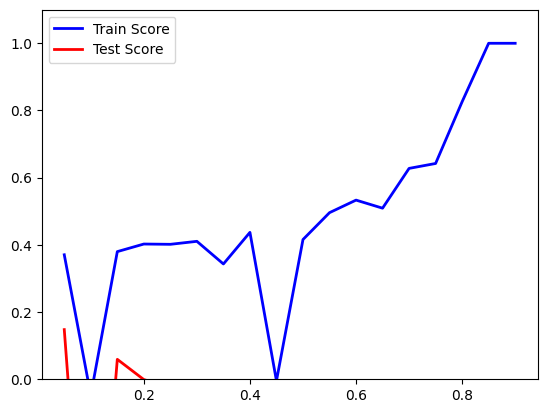

In [128]:
test_sizes = np.arange(0.05,0.95,0.05).tolist()  # Create an array with test ratios
results = {'test_sizes': [], 'train_scores': [], 'test_scores': []}
for test_size in test_sizes:
    _, _, _, _, _, _, train_score, test_score = utilities.model_clean_fit(df_prepared, 'Finances', test_size=test_size)
    results['test_sizes'].append(test_size)
    results['train_scores'].append(train_score)
    results['test_scores'].append(test_score)
utilities.plot_scores(results['test_sizes'], results['train_scores'], results['test_scores'])

So we can see the the test score of our model never is really good (often below 0). The maximum is 0.147 and with such a low value we will not be able to predict the spending behaviour.

So perhaps we need to narrow down our columns. Perhaps we need to use a little bit of domain knowledge. Phobias for example will not have an effect on spending behaviour (at least we don't think so). But let's give it a try.

In [102]:
# Let us see what columns have a high correlation with the Finance colum.
df_finance_corr = df_prepared.corr()['Finances']
df_finance_high_corr = df_finance_corr[df_finance_corr.between(0.1, 1)]
correlation_columns = df_finance_high_corr.index.tolist()
print(correlation_columns)

['Mathematics', 'Biology', 'Medicine', 'Prioritising workload', 'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement', 'Reliability', 'Keeping promises', 'Decision making', 'Borrowed stuff', 'Public speaking', 'Finding lost valuables', "Parents' advice", 'Questionnaires or polls', 'Finances', 'Smoking_never smoked', 'Alcohol_social drinker']


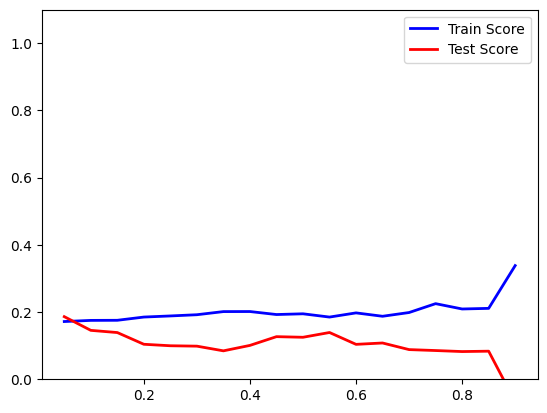

In [129]:
test_sizes = np.arange(0.05,0.95,0.05).tolist()  # Create an array with test ratios
results = {'test_sizes': [], 'train_scores': [], 'test_scores': []}
df_prepared_subset = df_prepared[correlation_columns]
for test_size in test_sizes:
    _, _, _, _, _, _, train_score, test_score = utilities.model_clean_fit(df_prepared_subset, 'Finances', test_size=test_size)
    results['test_sizes'].append(test_size)
    results['train_scores'].append(train_score)
    results['test_scores'].append(test_score)
utilities.plot_scores(results['test_sizes'], results['train_scores'], results['test_scores'])

This is much better for the test data now. But in the end the score is still quite low and also the training score is now worse than before. 

Since this model does not really perform well, we want to try a different one. 

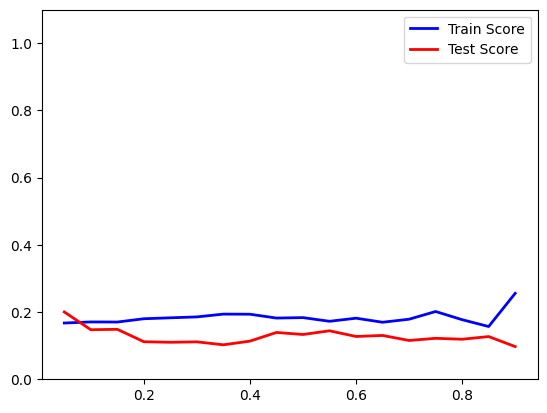

In [130]:
test_sizes = np.arange(0.05,0.95,0.05).tolist()  # Create an array with test ratios
results = {'test_sizes': [], 'train_scores': [], 'test_scores': []}
df_prepared_subset = df_prepared[correlation_columns]
for test_size in test_sizes:
    _, _, _, _, _, _, train_score, test_score = utilities.model_clean_fit(df_prepared_subset, 'Finances', test_size=test_size, model_selection='bayesianridge')
    results['test_sizes'].append(test_size)
    results['train_scores'].append(train_score)
    results['test_scores'].append(test_score)
utilities.plot_scores(results['test_sizes'], results['train_scores'], results['test_scores'])

Also other models (here only one shown, but others were also tested) did not show much difference or where even worse. Now it is time to think about what the score means. The documentation states: "In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a R2 score of 0.0". So for us this means that our model is slightly better then tossing a coin. . Lets see if we can use a different score to better understand the results of our model. This time we want to use the mean absolute percentage error to evaluate our model.

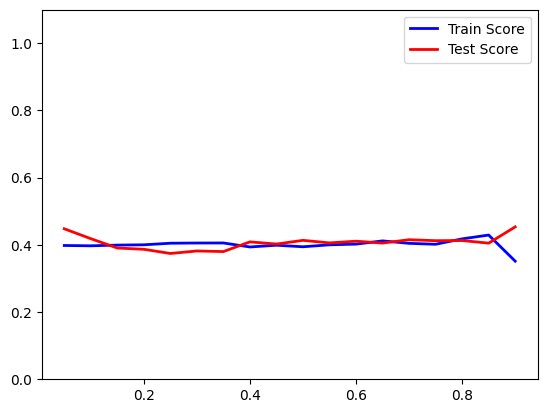

In [131]:
test_sizes = np.arange(0.05,0.95,0.05).tolist()  # Create an array with test ratios
results = {'test_sizes': [], 'train_scores': [], 'test_scores': []}
df_prepared_subset = df_prepared[correlation_columns]
for test_size in test_sizes:
    _, _, _, _, _, _, train_score, test_score = utilities.model_clean_fit(df_prepared_subset, 'Finances', test_size=test_size, metric_method='percent')
    results['test_sizes'].append(test_size)
    results['train_scores'].append(train_score)
    results['test_scores'].append(test_score)
utilities.plot_scores(results['test_sizes'], results['train_scores'], results['test_scores'])

Now this gives us a mean absolute error of somewhere below 40%. Now this also does not seem to be very good. BUT we need to think about that we did not test against a binary result. The spending behaviour is a value between 1 and 5. Instead of predicting a 5 which might be true ("I save all the money I can") we will predict perhaps a 4 or 3. And instead of predicting a 1 ("Basically I spend all the money I have") we will predict a 2 or 3. So in the end our model is not perfect but at least It can give us a faire tendency. 

### 4.2 Predict healty lifestyle
The next question we want to test is, if we can predict healty lifestyle. Now we will directly use only the columns that have a higher corelation for our model. And also we will directly use the mean absolute error to evaluate our model.

In [132]:
x, y, x_train, y_train, x_test, y_test, train_score, test_score = utilities.model_clean_fit(df_prepared, 'Healthy eating', metric_method='percent')
print('Model score to predict the healty lifestyle: Training Score: %s; Test Score: %s' % (str(train_score), str(test_score)))

Model score to predict the healty lifestyle: Training Score: 0.23087610350817955; Test Score: 0.34896309920183316


This test score looks better than the initial score for the healty lifestyle. Here the mean test error is 34%. And again we are talking about a target value that is between 1 and 5. So this model will already give us a tendency. But let us see if we can achieve better results with different train / test splits.

In [167]:
# Let us see what columns have a high correlation with the Finance colum.
df_healthy_corr = df_prepared.corr()['Healthy eating']
df_healthy_high_corr = df_healthy_corr[df_healthy_corr.between(0.14, 1)]
correlation_columns = df_healthy_high_corr.index.tolist()
print(correlation_columns)

['Biology', 'Foreign languages', 'Medicine', 'Art exhibitions', 'Countryside, outdoors', 'Dancing', 'Active sport', 'Gardening', 'Shopping', 'Healthy eating', 'Prioritising workload', 'Writing notes', 'Workaholism', 'Final judgement', 'Reliability', 'Health', 'Energy levels', 'Personality', 'Interests or hobbies', 'Spending on healthy eating']


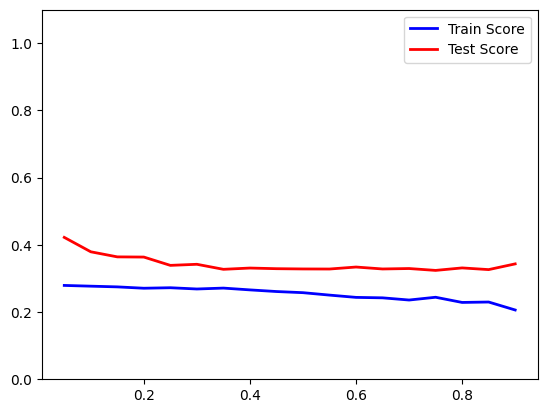

Minimum Test error: 0.3240313078610042


In [169]:
test_sizes = np.arange(0.05,0.95,0.05).tolist()  # Create an array with test ratios
results = {'test_sizes': [], 'train_scores': [], 'test_scores': []}
df_prepared_subset = df_prepared[correlation_columns]
for test_size in test_sizes:
    _, _, _, _, _, _, train_score, test_score = utilities.model_clean_fit(df_prepared_subset, 'Healthy eating', test_size=test_size, metric_method='percent')
    results['test_sizes'].append(test_size)
    results['train_scores'].append(train_score)
    results['test_scores'].append(test_score)
utilities.plot_scores(results['test_sizes'], results['train_scores'], results['test_scores'])
print('Minimum Test error: %s' % str(min(results['test_scores'])))

This means that we can predict the healty lifestyle with a 33.1% error. 

### 4.3 Christmas sellings
our third question we want to answer if, if we can predict christmas selling. Here the questions that the survey participants had to answer was: "I try to give as much as I can to other people at Christmas". An answer of 1 meant that the person strongly disagreed and a 5 indicates that this person strongly agrees. 

We will again directly start with the percent metric and will only ose the columns that have a higher corelation with our desired response.

In [170]:
# Let us see what columns have a high correlation with the Finance colum.
df_giving_corr = df_prepared.corr()['Giving']
df_giving_high_corr = df_giving_corr[df_giving_corr.between(0.15, 1)]
correlation_columns = df_giving_high_corr.index.tolist()
print(correlation_columns)

['Romantic', 'Fantasy/Fairy tales', 'Dancing', 'Shopping', 'Fun with friends', 'Rats', 'Prioritising workload', 'Writing notes', 'Empathy', 'Giving', 'Compassion to animals', 'Health', 'Charity', 'Number of friends', 'Children', 'Life struggles', 'Energy levels', 'Shopping centres', 'Gender_female']


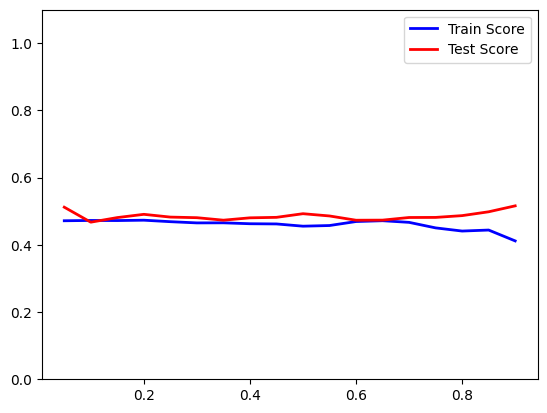

Minimum Test error: 0.4675718289535644


In [171]:
test_sizes = np.arange(0.05,0.95,0.05).tolist()  # Create an array with test ratios
results = {'test_sizes': [], 'train_scores': [], 'test_scores': []}
df_prepared_subset = df_prepared[correlation_columns]
for test_size in test_sizes:
    _, _, _, _, _, _, train_score, test_score = utilities.model_clean_fit(df_prepared_subset, 'Giving', test_size=test_size, metric_method='percent')
    results['test_sizes'].append(test_size)
    results['train_scores'].append(train_score)
    results['test_scores'].append(test_score)
utilities.plot_scores(results['test_sizes'], results['train_scores'], results['test_scores'])
print('Minimum Test error: %s' % str(min(results['test_scores'])))

Here our model has a mean absolute error of 46% which is less than for the other questions we tried to answer.

## 5. Result evaluation
All in all we must say that the overall results are not groundbreaking. In the end our models CAN give a tendency, but they will not be able to anser the posed questions with certainty

## 5.1 Spending habbits
Our model had an mean absolute percentage error of around 40 percent. Again we need to think about what this means for our goal of selling more stuff and target the right persons with advertisement. 
* Given the fact that we know about the following interest of a customer: Mathematics, Biology, Medicine, Prioritising workload, Writing notes, Workaholism, Thinking ahead, Final judgement, Reliability, Keeping promises, Decision making, Borrowed stuff, Public speaking, Finding lost valuables, Parents advice, Questionnaires or polls, Finances, Smoking_never smoked, Alcohol_social drinker
* If a person actually tries to SAVE all of his money (value 5), we would predict something between 3 - 5 (not sure to save everything). 
* If a person actually spends everything (value 1) our model would predict a value between 1 and 3 (spend everything to not sure)
* So in the end our model is not perfect (not nearly), but it still could save us a fair amount of money when our advertisement is only targeted to people where our model predicts that they are likely to spend all of their money. 

## 5.2 Healthy lifestyle
Here our model shows a mean absolute percentage error of about 32 percent. Here the error is even petter than for the first question. When we think about what this means for our advertisement campaign, we can conclude:
* If we know about this interests of a person: Biology, Foreign languages, Medicine, Art exhibitions, Countryside, outdoors, Dancing, Active sport, Gardening, Shopping, Healthy eating, Prioritising workload, Writing notes, Workaholism, Final judgement, Reliability, Health, Energy levels, Personality, Interests or hobbies, Spending on healthy eating
* Then our model can predict with a 32% error if someone has an healthy lifestyle. 
* And again we could target our marketing exactly to those people. 
* But lets be honset. If I already know if someone likes Dancing, Healthy eating and likes active sports. Who would have thought that this person has a healthy lifestyle. 

## 5.3 Christmas sellings
Here our model showed an error of 46 %. That is somehow only slightly better than tossing a coin (for a binary result). For our case where we have a target value between 1 to 5 a 50 Percent error rate means, instead of a 5, we could also predict a 2.5 and instead of predicting a 1 we might predict a 1.5 (qood question here: Does this 50% average error means in regard to the current value or the overall maximum?). But in the end, if I were an actual company I would not bet on this results. 